In [2]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import numpy as np
from sklearn.preprocessing import StandardScaler
import pubchempy as pcp
import matplotlib.pyplot as plt


import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Import Data

In [3]:
cek = pd.read_csv("../data/string_interactions_short.tsv default node.csv")
cek

,AverageShortestPathLength,BetweennessCentrality,cl1.Status,ClosenessCentrality,ClusteringCoefficient,Degree,Eccentricity,IsSingleNode,name,NeighborhoodConnectivity,NumberOfDirectedEdges,NumberOfUndirectedEdges,PartnerOfMultiEdgedNodePairs,Radiality,selected,SelfLoops,shared name,Stress,TopologicalCoefficient
0,3.278788,0.000000,Outlier,0.304991,1.000000,2,5,False,UBXN4,14.500000,0,2,0,0.962643,False,0,UBXN4,0,0.725000
1,3.878788,0.000000,Outlier,0.257812,0.000000,1,5,False,TMEM59,4.000000,0,1,0,0.952807,False,0,TMEM59,0,0.000000
2,3.315152,0.000000,Outlier,0.301645,0.000000,1,5,False,RNF103,18.000000,0,1,0,0.962047,False,0,RNF103,0,0.000000
3,3.084848,0.000000,Outlier,0.324165,0.000000,1,4,False,SH3PXD2A,31.000000,0,1,0,0.965822,False,0,SH3PXD2A,0,0.000000
4,3.036364,0.000000,Outlier,0.329341,0.000000,1,5,False,TRIM11,30.000000,0,1,0,0.966617,False,0,TRIM11,0,0.000000
5,4.369697,0.000000,Outlier,0.228849,0.000000,1,6,False,PPP4C,2.000000,0,1,0,0.944759,False,0,PPP4C,0,0.000000
6,3.375758,0.012121,Outlier,0.296230,0.000000,2,5,False,PPP2R2A,5.500000,0,2,0,0.961053,False,0,PPP2R2A,1620,0.500000
7,3.012121,0.000000,Outlier,0.331992,1.000000,2,4,False,PLCD1,18.500000,0,2,0,0.967014,False,0,PLCD1,0,0.528571
8,2.884848,0.000085,Cluster,0.346639,0.000000,2,5,False,SERPINI1,24.000000,0,2,0,0.969101,False,0,SERPINI1,26,0.560976
9,3.466667,0.000000,Cluster,0.288462,0.000000,1,6,False,PAX4,14.000000,0,1,0,0.959563,False,0,PAX4,0,0.000000


In [4]:
def eigen(i):
    df=pd.read_csv('../data/'+i+'.csv')
    df_name=df['name']
    df=df[['BetweennessCentrality','ClosenessCentrality','ClusteringCoefficient','Degree','Radiality','Stress','TopologicalCoefficient']]#
    scaler = StandardScaler()
    df_scaled=(scaler.fit_transform(df))
    print(df_scaled)
    n_samples = df_scaled.shape[0]
    print(n_samples)
    pca = PCA()
    X_transformed = pca.fit_transform(df_scaled)
    print(X_transformed)
    X_centered = df_scaled - np.mean(df_scaled, axis=0)
    cov_matrix = np.dot(X_centered.T, X_centered) / n_samples
    eigenvalues = pca.explained_variance_
    print('clus ',i)
    print('var ratio:',pca.explained_variance_ratio_[0])
    print('eigen value:',eigenvalues[0])
    print('eigen vector:',pca.components_[0])
    print('_______________________________________________')

    df_scaled=pd.DataFrame(df_scaled,columns=['BetweennessCentrality','ClosenessCentrality','ClusteringCoefficient','Degree','Radiality','Stress','TopologicalCoefficient'])
    df_scaled['Overall']=0.0
    for k in range(0,n_samples):
        temp=0
        for j in range(0,len(pca.components_[0])):
            temp=temp+pca.components_[0][j]*df_scaled[df_scaled.columns[j]][k]
        df_scaled['Overall'][k]=temp
        print('overall ',temp)
    pd.concat([df_name, df_scaled], axis=1, sort=False).to_excel('../data/centrality_'+str(i)+'.xlsx')

In [5]:
eigen('string_interactions_short.tsv default node')

[[-0.52443219 -0.8278469   2.42189726 ... -1.07080842 -0.55015118
   2.89898096]
 [-0.52443219 -1.34398147 -1.28789013 ... -2.25182206 -0.55015118
  -1.74471385]
 [-0.52443219 -0.86444611 -1.28789013 ... -1.14238501 -0.55015118
  -1.74471385]
 ...
 [ 2.12669997  1.40686966 -0.3349532  ...  1.51787804  3.2238024
  -0.84573347]
 [ 0.37540526  1.02263904  0.09667439 ...  1.2315717   0.9191115
  -0.57997412]
 [ 0.22747223  0.68798656  0.01665049 ...  0.94526536  0.28764873
  -0.33170588]]
168
[[-2.49663485 -3.0535023  -1.18083497 ...  0.41990808  0.25609355
  -0.00778716]
 [-1.79739478  2.81961071 -0.6966683  ...  0.41925471  0.40323869
   0.01728762]
 [-1.16827653  2.48045928  0.08934548 ...  0.22942371 -0.08056712
  -0.06203988]
 ...
 [ 5.52521894 -0.21723741 -1.20566996 ... -0.79098653  0.82638709
  -0.40379441]
 [ 2.47913871 -0.38392151  0.39092533 ... -0.77848128  0.45556266
  -0.08969177]
 [ 1.17960753 -0.19780414  0.60864475 ... -0.15739806 -0.12891363
  -0.02408337]]
clus  string_i

In [6]:
data = pd.read_excel('../data/centrality_string_interactions_short.tsv default node.xlsx')
data

,Unnamed: 0,name,BetweennessCentrality,ClosenessCentrality,ClusteringCoefficient,Degree,Radiality,Stress,TopologicalCoefficient,Overall
0,0,UBXN4,-0.524432,-0.827847,2.421897,-0.795248,-1.070808,-0.550151,2.898981,-2.496635
1,1,TMEM59,-0.524432,-1.343981,-1.287890,-0.901618,-2.251822,-0.550151,-1.744714,-1.797395
2,2,RNF103,-0.524432,-0.864446,-1.287890,-0.901618,-1.142385,-0.550151,-1.744714,-1.168277
3,3,SH3PXD2A,-0.524432,-0.618079,-1.287890,-0.901618,-0.689067,-0.550151,-1.744714,-0.892523
4,4,TRIM11,-0.524432,-0.561449,-1.287890,-0.901618,-0.593631,-0.550151,-1.744714,-0.832704
5,5,PPP4C,-0.524432,-1.660847,-1.287890,-0.901618,-3.218106,-0.550151,-1.744714,-2.307971
6,6,PPP2R2A,0.076514,-0.923693,-1.287890,-0.795248,-1.261679,-0.069884,1.457834,-1.492503
7,7,PLCD1,-0.524432,-0.532451,2.421897,-0.795248,-0.545913,-0.550151,1.640837,-1.861936
8,8,SERPINI1,-0.520205,-0.372215,-1.287890,-0.795248,-0.295395,-0.542443,1.848389,-1.476126
9,9,PAX4,-0.524432,-1.008678,-1.287890,-0.901618,-1.440621,-0.550151,-1.744714,-1.343075


In [7]:
x=data.iloc[:,1]
x

0         UBXN4
1        TMEM59
2        RNF103
3      SH3PXD2A
4        TRIM11
5         PPP4C
6       PPP2R2A
7         PLCD1
8      SERPINI1
9          PAX4
10      SLC22A4
11         SNCG
12         PLD1
13         QPCT
14       KCNIP3
15      NFKBIL1
16       SORBS1
17       PTPN22
18       LYPLA1
19       GTF2H1
20          TBP
21         GSAP
22         GPR3
23          GNE
24         GLO1
25         SNCB
26       SNCAIP
27          KMO
28          RYK
29         REST
30        EHMT1
31         ECE2
32        PRKCE
33         ECE1
34       LRRTM3
35       CTNND2
36         FLNB
37          SCT
38          HFE
39      ZFAND2A
40        PTGDS
41        VSNL1
42       CHI3L1
43          CRH
44         RELN
45      COL25A1
46     PAFAH1B1
47        MAP1B
48        TTBK1
49       NCKAP1
50         COQ2
51        CD244
52     HLA-DQB1
53         CCR2
54        PRKCD
55        CASP7
56          FAS
57       HSPA1A
58         SOD2
59        HDAC2
60       MAPK10
61         GLUL
62      

In [8]:
y=data.iloc[:,9]
y

0      -2.496635
1      -1.797395
2      -1.168277
3      -0.892523
4      -0.832704
5      -2.307971
6      -1.492503
7      -1.861936
8      -1.476126
9      -1.343075
10     -2.188968
11     -2.263390
12     -0.417288
13     -1.380248
14     -0.832704
15     -1.131745
16     -1.792686
17      0.376865
18     -1.753138
19     -2.072933
20      0.239900
21     -1.411641
22     -0.951692
23     -1.168277
24     -1.418534
25     -0.528441
26     -0.485665
27     -1.340036
28     -0.644452
29     -1.416733
30     -2.625989
31     -2.134635
32     -0.142113
33     -0.639493
34     -2.502716
35     -0.112562
36     -1.063929
37     -2.395993
38     -1.962508
39     -1.614445
40     -2.050788
41     -2.220653
42     -0.045095
43     -0.266475
44     -0.170543
45     -0.628323
46     -0.536414
47      0.246979
48     -1.403045
49     -1.564757
50     -1.211980
51     -1.427865
52     -0.287089
53     -0.124996
54      0.555408
55     -0.569890
56      0.146815
57      1.442054
58      1.2964

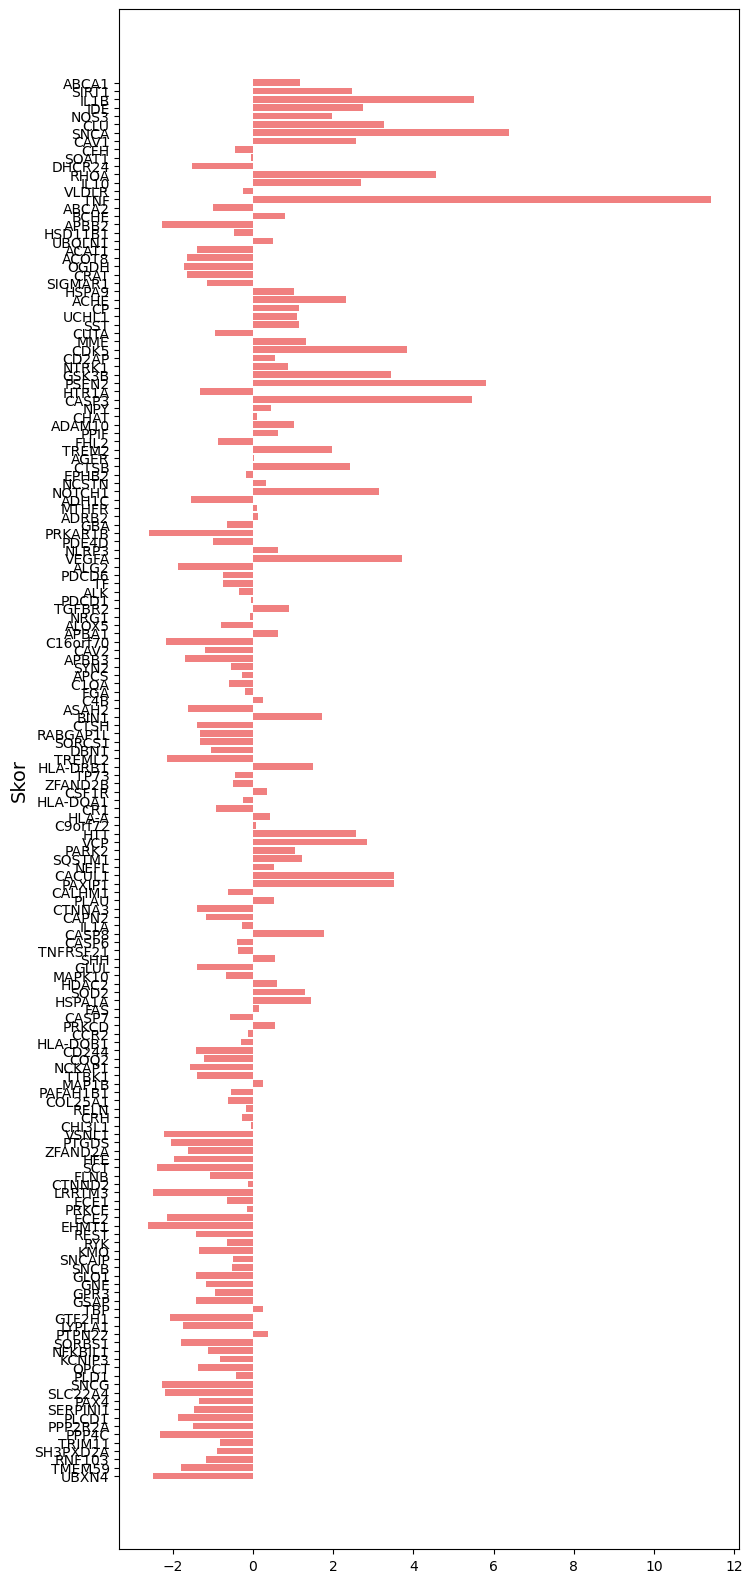

In [9]:
plt.figure(figsize=(8,20))
plt.barh(x, y, color='lightcoral')

plt.ylabel('Skor', size=14)
plt.xticks(size=10)
plt.yticks(size=10)

plt.show()

In [10]:
Pakai = data[data['Overall'] >= 0].sort_values(by='Overall',ascending = False)
# Pakai.to_excel('Data PKM Alzheimer/Centrality_Overall_More_Than_Zero.xlsx')
Pakai

,Unnamed: 0,name,BetweennessCentrality,ClosenessCentrality,ClusteringCoefficient,Degree,Radiality,Stress,TopologicalCoefficient,Overall
153,153,TNF,8.038771,1.872701,-0.620939,5.480624,1.816114,7.691476,-1.017312,11.428028
161,161,SNCA,3.742701,1.441474,-0.501605,3.034098,1.541737,4.040257,-0.920529,6.378463
131,131,PSEN2,4.415966,1.191951,-0.631215,2.183132,1.362795,3.287245,-1.020148,5.802998
165,165,IL1B,2.126700,1.406870,-0.334953,3.672322,1.517878,3.223802,-0.845733,5.525219
129,129,CASP3,2.295503,1.441474,-0.249494,3.459581,1.541737,3.119448,-0.815940,5.461991
156,156,RHOA,2.804115,1.067744,-0.482108,2.289503,1.267360,2.347463,-0.842314,4.559682
135,135,CDK5,2.344648,0.863702,-0.494856,1.544908,1.100348,2.283427,-0.833644,3.832354
110,110,VEGFA,1.289255,1.098253,-0.221716,2.714986,1.291219,1.611052,-0.751924,3.721995
71,71,PAXIP1,-0.524432,6.775619,-1.287890,-0.901618,3.414658,-0.550151,-1.744714,3.517905
72,72,CACUL1,-0.524432,6.775619,-1.287890,-0.901618,3.414658,-0.550151,-1.744714,3.517905


In [11]:
Pakai = Pakai.reset_index(drop = True).drop(columns = 'Unnamed: 0')

In [12]:
Nama = Pakai['name']
Nama

0          TNF
1         SNCA
2        PSEN2
3         IL1B
4        CASP3
5         RHOA
6         CDK5
7        VEGFA
8       PAXIP1
9       CACUL1
10       GSK3B
11         CLU
12      NOTCH1
13         VCP
14         IDE
15        IL10
16        CAV1
17         HTT
18       SIRT1
19        CTSB
20        ACHE
21        NOS3
22       TREM2
23       CASP8
24        BIN1
25    HLA-DRB1
26      HSPA1A
27         MME
28        SOD2
29      SQSTM1
30       ABCA1
31         SST
32          CP
33       UCHL1
34       PARK2
35       HSPA9
36      ADAM10
37      TGFBR2
38       NTRK1
39        BCHE
40       NLRP3
41       APBA1
42        PPIF
43       HDAC2
44       CD2AP
45       PRKCD
46         SHH
47        PLAU
48        NEFL
49      UBQLN1
50         NPY
51       HLA-A
52      PTPN22
53       CSF1R
54       NCSTN
55       MAP1B
56         C4B
57         TBP
58         FAS
59       ADRB2
60        CHAT
61       MTHFR
62     C9orf72
63        AGER
Name: name, dtype: object

In [13]:
smiles_dict = {}  # Empty dictionary to store key-value pairs
for i in Nama :
    results = pcp.get_compounds(i, 'name')
    for compound in results:
        Smiles = compound.isomeric_smiles
        smiles_dict[i] = Smiles

In [14]:
keys = smiles_dict.keys()

In [15]:
# results = pcp.get_compounds('TNF', 'name')
# for compound in results:
#     print(compound.isomeric_smiles)
#     print(compound.iupac_name)
#     print(compound.synonyms)